# Pytorch Introduction
In this notebook we get used to simple tensor (matrix) operations and the workflow of training a machine learning algorithms in Pytorch.
## Goals:
* Learn how to create `torch.Tensor`.
* Play with `torch.Tensor` in simple matrix operations and GPU compute.
* Re-implement a linear regression using Pytorch

In `pytorch`, we use `torch.Tensor` object to represent data matrix. It is a lot like `numpy` array but not quite the same. `torch` provide APIs to easily convert data between `numpy` array and `torch.Tensor`. Let's play a little bit.

In [1]:
from __future__ import print_function
import numpy as np
import torch

## Creating a `torch.Tensor`

Converting a numpy into `torch.Tensor` can be done by a constructor. Bringing it back into `numpy` array is also a simple `numpy()` function call. The `torch.Tensor` constructor takes any _python array-like_ objects (of the same types), so we can also construct from a list of integers.

In [2]:
# Create numpy array
data_np = np.zeros([10,10],dtype=np.float32)

# Fill something
np.fill_diagonal(data_np,1.)
print('Numpy data\n',data_np)

# Create torch.Tensor
data_torch = torch.Tensor(data_np)
print('\ntorch.Tensor data\n',data_torch)

# Bringing back into numpy array
data_np = data_torch.numpy()
print('\nNumpy data (converted back from torch.Tensor)\n',data_np)

# One can make also from a list
data_list = [1,2,3]
data_list_torch = torch.Tensor(data_list)
print('\nPython list :',data_list)
print('torch.Tensor:',data_list_torch)

Numpy data
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

torch.Tensor data
 tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Numpy data (converted back from torch.Tensor)
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.

## Operations on `torch.Tensor`
Ordinary operations to an array also exists like `numpy`. A single scalar value can be extracted using a function `item()`. 

In [3]:
# mean & std
print('mean',data_torch.mean().item(),'std',data_torch.std().item(),'sum',data_torch.sum().item())

mean 0.10000000149011612 std 0.30151134729385376 sum 10.0


Common operations include element-wise multiplication, matrix multiplication, and reshaping. Read the [documentation](https://pytorch.org/docs/stable/tensors.html) to find the right function for what you want to do!

In [4]:
# Two matrices 
data_a = np.zeros([3,3],dtype=np.float32)
data_b = np.zeros([3,3],dtype=np.float32)
np.fill_diagonal(data_a,1.)
data_b[0,:]=1.
# print them
print('Two numpy matrices')
print(data_a)
print(data_b,'\n')

# Make torch.Tensor
torch_a = torch.Tensor(data_a)
torch_b = torch.Tensor(data_b)
print('torch.Tensor element-wise multiplication:')
print(torch_a*torch_b)
print('\ntorch.Tensor matrix multiplication:')
print(torch_a.matmul(torch_b))

Two numpy matrices
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 

torch.Tensor element-wise multiplication:
tensor([[1., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

torch.Tensor matrix multiplication:
tensor([[1., 1., 1.],
        [0., 0., 0.],
        [0., 0., 0.]])


## Compute `torch.Tensor` on a GPU

Putting `torch.Tensor` on GPU is as easy as calling `.cuda()` function (and if you want to bring it back to cpu, call `.cpu()` on a `cuda.Tensor`). Let's do a simple speed comparison!

In [5]:
# Create 10000x10000 matrix
data_np=np.zeros([10000,10000],dtype=np.float32)
data_cpu = torch.Tensor(data_np).cpu()
data_gpu = torch.Tensor(data_np).cuda()

# Compute time in CPU
import time
t0=time.time()
mean = (data_cpu * data_cpu).mean().item()
print('Using CPU:',time.time()-t0,'[s]')

# Compute time in GPU
t0=time.time()
mean = (data_gpu * data_gpu).mean().item()
print('Using GPU:',time.time()-t0,'[s]')


Using CPU: 0.06822323799133301 [s]
Using GPU: 0.004759788513183594 [s]


Using, GPU, we get more than x10 acceleration :) Play with `torch.Tensor`. 

## Linear Regression using Torch

Besides supporting GPUs for tensor calculation, Pytorch (and other machine learning libraries like Tensorflow, MXNet, etc.) implements powerful features such as `autograd`, an automated gradient calculation. We practice a linear regression again below, but this time using Pytorch.

First, let's create the data sample to play with.

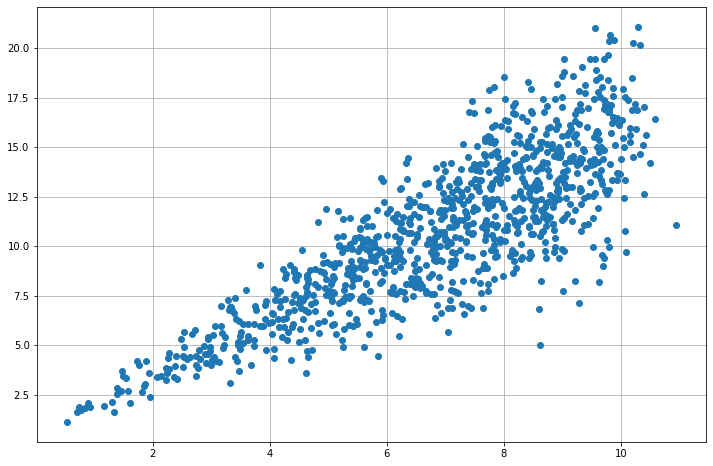

In [6]:
from kmi.iotools.fake_data import linear_regression

a,b=1.5,0.5
x,y=linear_regression(a,b,num_sample=1000)

import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(12,8),facecolor='w')
plt.plot(x,y,linestyle='',marker='o',markersize=6)
plt.grid()
plt.show()

### Pytorch `Module`: your ML algorithm
Before optimizing an algorithm, we have to design one! In Pytorch, your ML algorithm is implemented as a `torch.nn.Module` type object. Below we define a very simple module that performs a linear transformation `y=ax+b` using `torch.nn.Linear` module. 

`torch.nn.Linear` module can take $k$-dimensional inout and perform a linear transformation to produce $\ell$-dimensional output.
$$
\hat{y}_{\ell,1} = a_{\ell,k}\cdot x_{k,1} + b_{\ell,1}
$$
where $a_{\ell,k}$ and $b_{\ell,1}$ are trainable weights. In our simple case, both $k$ and $\ell$ are scalars.

In [7]:
class LinearRegression(torch.nn.Module):
    
    def __init__(self):
        
        super(LinearRegression, self).__init__()
        
        # Construct a linear layer with 1 input (i.e. x) and 1 output (i.e. prediction of y)
        # bias=True adds the constant term "b" of "y=ax+b".
        self.linear = torch.nn.Linear(in_features  = 1,
                                      out_features = 1, 
                                      bias = True)
    
    def forward(self,x):
        return self.linear(x)

The next step is to instantiate (create) the algorithm for training + two more steps:
* Define the MSE error (`torch.nn.MSELoss`)
* Instantiate the gradient descent optimizer

In [8]:
# Instantiate the algorithm
model = LinearRegression()

# Define the loss: MSE
criterion = torch.nn.MSELoss() 

# Create an optimizer which takes care of the weight update size etc.
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

The next cell shows the train loop = how to use those practically

In [9]:
# first, prep data in Tensor
x=torch.Tensor(x)
y=torch.Tensor(y)

# run 50 iterations
ITERATIONS = 50

losses = []
for step in range(ITERATIONS):
    
    # Initialize the gradient
    optimizer.zero_grad()
    
    # Let the model predict: note x.view(-1,1) reshapes (k) to (k,1) array
    prediction = model(x.view(-1,1))

    # Compute the error = loss: we reshape the output (l,1) to (l)
    loss = criterion(prediction.view(-1), y)
    
    losses.append(loss.item())

    # Now propagate the gradient for what is in the process history!
    loss.backward()

    # Update the weights
    optimizer.step()

Optimized? Let's visualize the loss curve:

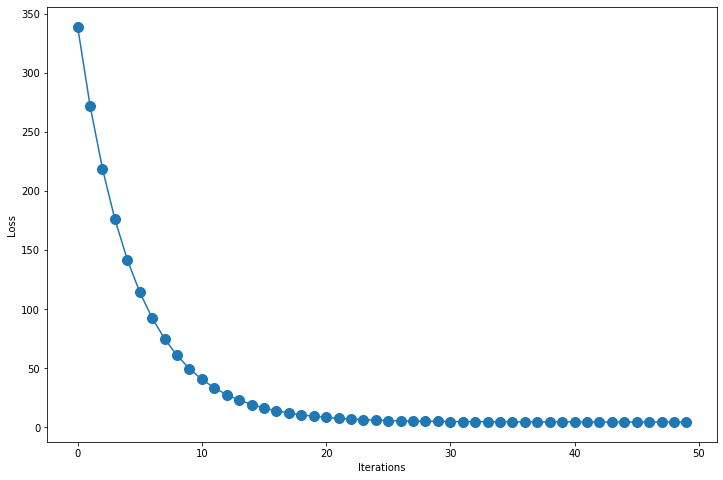

In [10]:
# Plot
fig,ax = plt.subplots(figsize=(12,8),facecolor='w')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(losses,marker='o',markersize=10)
plt.show()

## Saving and Retrieving the algorithm parameters
Once you train the network, you might want to save the trained parameters. Below we try this exercise.

First, let's take a look at the current parameters. 

In [11]:
for name,param in model.named_parameters():
    print(name, param.data)

linear.weight tensor([[1.5349]])
linear.bias tensor([0.0940])


`linear.weight` and `linear.bias` are the $a$ and $b$ of the linear transformation $y=ax+b$! Let's save these parameter values in a file named `weights.ckpt`.

In [12]:
torch.save(dict(state_dict = model.state_dict()), 'weights.ckpt')

Do you see `weights.ckpt` created? Next, let's create a brand-new algorithm with initialized parameter values. We call this `new_model`.

In [13]:
new_model = LinearRegression()
for name,param in new_model.named_parameters():
    print(name, param.data)

linear.weight tensor([[-0.2415]])
linear.bias tensor([-0.6409])


... yep the initial parameter values are far from the actual values. Let's load the parameter values from `weights.ckpt`.

In [14]:
with open('weights.ckpt', 'rb') as f:
    data = torch.load(f)
    new_model.load_state_dict(data['state_dict'])
    
for name,param in new_model.named_parameters():
    print(name, param.data)

linear.weight tensor([[1.5349]])
linear.bias tensor([0.0940])


## Closing
In this notebook we played with `torch.Tensor` which is a Pytorch version of `np.ndarray`, and also practiced a primitive algorithm optimization workflow in Pytorch. In the next notebook we will try a logistic regression using Pytorch.